MDP: [2] inputs ['u1'] --> 2 states x1 --> 2 outputs x1
MDP: [2, 3] inputs ['u2', 'u3'] --> 2 states x2 --> 2 outputs x2
MDP network: (2, 3) inputs ('u1', 'u3'), [2, 2] states ['x1', 'x2'], [2, 2] outputs ['x1', 'x2']


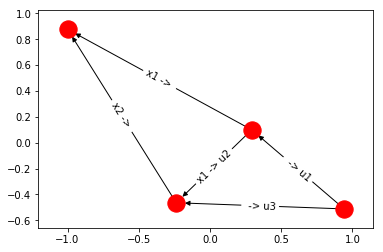

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import best.pomdp as BP
import importlib

importlib.reload(BP)

T0 = np.array([[0, 1], [1, 0]])
T1 = np.array([[1, 0], [0, 1]])
T2 = np.array([[1, 0], [0, 1]])

Z0 = np.eye(2)
Z1 = np.eye(2)
Z2 = np.eye(2)

pomdp1 = BP.POMDP({(0,): T0, (1,): T1}, input_names=['u1'], state_name='x1')
pomdp2 = BP.POMDP({(0,0): T0, (0,1): T1, (0,2): T1, (1,2): T1, (1,0): T2, (1,1): T2}, input_names=['u2', 'u3'], state_name='x2')

print(pomdp1)
print(pomdp2)

network = BP.POMDPNetwork()

network.add_pomdp(pomdp1)
network.add_pomdp(pomdp2)

network.add_connection(pomdp1, 'x1', pomdp2, 'u2', lambda z1: z1)

print (network)

network.plot()

plt.show()

In [2]:
for key in pomdp1.Tmat_coo.keys():
    print(np.array(key))
asd = np.amax(np.stack(np.array(key) for key in pomdp1.Tmat_coo.keys()), axis=0)
print(asd)


[0]
[1]
[1]
